In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import pandas as pd




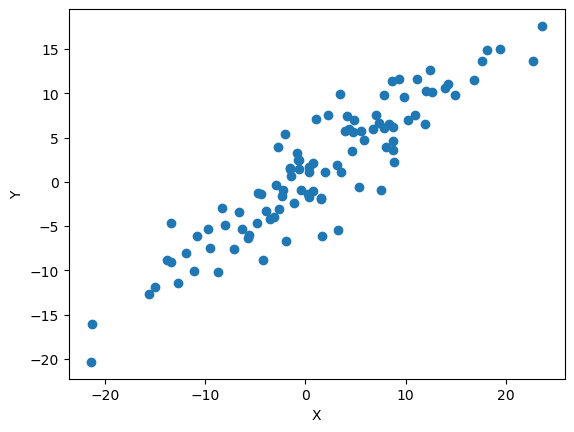

In [20]:
df = pd.read_csv('ejercicio_1.csv')
x=df["X"]
y=df[" Y"]
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [17]:
MXT=np.array([x])
MX=MXT.transpose()
INV=MXT@MX
INV=np.linalg.inv(INV)
yv=(np.array([y])).transpose()
B=INV@MXT@yv
BP=B[0][0]

def fl(x, b):
    return b * x

yp=fl(x,BP)



(100, 1)
[[0.75785414]]


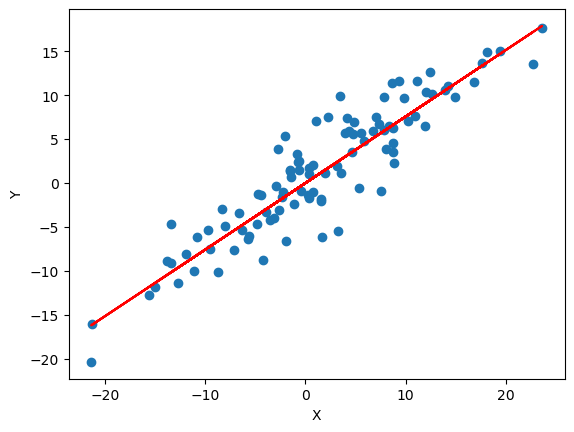

In [23]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,yp,color="red")
plt.show()

In [39]:
yv12=(np.array([y+12])).transpose()
B12=INV@MXT@yv12
BP12=B12[0][0]
def fl12(x, b):
    return b * x 
yp12=fl12(x,BP12)


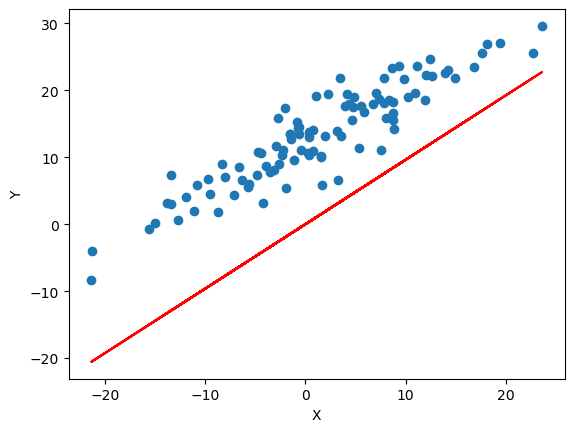

In [40]:
plt.scatter(x,y+12)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x,yp12,color="red")
plt.show()

Esta aproximacion no es buena. El problema con esta es que cuando se hace este tipo de regresion, no se esta teniendo el cuenta la ordenada al origen. Como todos los puntos aumentan en 12 unidades en el punto Y, la ordenada al origen tambien aumenta en 12. En nuestra regresion no tenemos ningun parametro para la ordenada al orige. Esto se podria solucionar agregando un B0 que sea la ordenada al origen para poder estabilizar el grafico.

In [ ]:
df2=pd.read_csv("ejercicio_2.csv")
